Routines for plotting the long-term performance (e.g., temporal mean bias/variance, zonal means/eofs) of the emulator, averaged across different randomly initialized and trained emulators.

In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import yaml

In [2]:
# List all ensemble run_nums
# run_nums = ['0000_BASE_seed_0', '0000_BASE_seed_10', '0000_BASE_seed_20',
#             '0000_BASE_seed_30', '0000_BASE_seed_40']
run_nums = ['0000_BASE_seed_0', '0000_BASE_seed_20',
            '0000_BASE_seed_40']

# Config file path
config_file_path = "config/config_0000_BASE_seed_0.yaml"
with open(config_file_path, "r") as f:
    config = yaml.safe_load(f)

dataset_params = config["dataset_params"]
short_analysis_params = config["short_analysis_params"]
long_analysis_params = config["long_analysis_params"]

root_dir = dataset_params["root_dir"]

In [3]:
# Gather training statistics

analysis_dir = os.path.join(root_dir, run_nums[0], "analysis", "train")

data = np.load(analysis_dir + '/temporal_mean.npz')
u_mean_train = data['U_mean']
v_mean_train = data['V_mean']
omega_mean_train = data['Omega_mean']

data = np.load(analysis_dir + '/zonal_mean.npz')
u_zonal_mean_train = data['U_zonal_mean']

data = np.load(analysis_dir + '/zonal_eof.npz')
u_eofs_train = data['EOF_U']
u_expvar_train = data['exp_var_U']
omega_eofs_train = data['EOF_Omega']
omega_expvar_train = data['exp_var_Omega']

data = np.load(analysis_dir + '/extremes.npz')
u_std = 2.34
v_std = 1.88
omega_std = 10.41
u_max_train = data['U_max']/u_std
u_min_train = data['U_min']/u_std
v_max_train = data['V_max']/v_std
v_min_train = data['V_min']/v_std
omega_max_train = data['Omega_max']/omega_std
omega_min_train = data['Omega_min']/omega_std

In [4]:
# Gather ground truth statistics

analysis_dir = os.path.join(root_dir, run_nums[0], "analysis", "truth")

data = np.load(analysis_dir + '/temporal_mean.npz')
u_mean_truth = data['U_mean']
v_mean_truth = data['V_mean']
omega_mean_truth = data['Omega_mean']

data = np.load(analysis_dir + '/zonal_mean.npz')
u_zonal_mean_truth = data['U_zonal_mean']

data = np.load(analysis_dir + '/zonal_eof.npz')
u_eofs_truth = data['EOF_U']
u_expvar_truth = data['exp_var_U']
#omega_eofs_truth = data['EOF_Omega']
#omega_expvar_truth = data['exp_var_Omega']

div_truth = np.load(analysis_dir + '/div.npy')

data = np.load(analysis_dir + '/extremes.npz')
u_std = 2.34
v_std = 1.88
omega_std = 10.41
u_max_truth = data['U_max']/u_std
u_min_truth = data['U_min']/u_std
v_max_truth = data['V_max']/v_std
v_min_truth = data['V_min']/v_std
omega_max_truth = data['Omega_max']/omega_std
omega_min_truth = data['Omega_min']/omega_std

In [ ]:
# Gather all emulator statistics

u_mean, v_mean, omega_mean = [], [], []
u_zonal_mean = []
u_eofs, omega_eofs = [], []
u_expvar, omega_expvar = [], []
div = []
u_max, v_max, omega_max = [], [], []
u_min, v_min, omega_min = [], [], []
u_std = 2.34
v_std = 1.88
omega_std = 10.41

for run_num in run_nums:
    analysis_dir = os.path.join(root_dir, run_num, "analysis", "emulate")

    # Temporal means
    data = np.load(analysis_dir + '/temporal_mean.npz')
    print(f'u_mean.shape: {data["U_mean"].shape}')
    u_mean.append(data['U_mean'])
    v_mean.append(data['V_mean'])
    omega_mean.append(data['Omega_mean'])

    # Zonal means
    data = np.load(analysis_dir + '/zonal_mean.npz')
    print(f'u_zonal_mean.shape: {data["U_zonal_mean"].shape}')
    u_zonal_mean.append(data['U_zonal_mean'])

    # EOFs
    data = np.load(analysis_dir + '/zonal_eof.npz')
    print(f'u_eof.shape: {data["EOF_U"].shape}')
    u_eofs.append(data['EOF_U'])
    u_expvar.append(data['exp_var_U'])
    #omega_eofs.append(data['EOF_Omega'])
    #omega_expvar.append(data['exp_var_Omega'])

    # Div
    data = np.load(analysis_dir + '/div.npy')
    print(f'div.shape: {data.shape}')
    div.append(data)

    # Extremes
    data = np.load(analysis_dir + '/extremes.npz')
    print(f'u_max.shape: {data["U_max"].shape}')
    u_max.append(data['U_max']/u_std)
    u_min.append(data['U_min']/u_std)
    v_max.append(data['V_max']/v_std)
    v_min.append(data['V_min']/v_std)
    omega_max.append(data['Omega_max']/omega_std)
    omega_min.append(data['Omega_min']/omega_std)


### Temporal Means: Bias

In [6]:
# Compute average (over ensemble) absolute bias for U, V, Omega temporal means:
#   mean(abs(truth - train))
#   mean_i(abs(truth - pred_i))
#   mean_i(abs(train - pred_i))

def reduce(x, reduce_type):
    if reduce_type == "abs":
        return np.abs(x)
    return x


reduce_type = None

u_temporal_bias = []
v_temporal_bias = []
omega_temporal_bias = []

# Truth vs train
u_temporal_bias.append(reduce(u_mean_truth - u_mean_train, reduce_type))
v_temporal_bias.append(reduce(v_mean_truth - v_mean_train, reduce_type))
omega_temporal_bias.append(reduce(omega_mean_truth - omega_mean_train, reduce_type))

# Truth vs pred
u_abs_err, v_abs_err, omega_abs_err = [], [], []
for i in range(len(u_mean)):
    u_abs_err.append(reduce(u_mean_truth - u_mean[i], reduce_type))
    v_abs_err.append(reduce(v_mean_truth - v_mean[i], reduce_type))
    omega_abs_err.append(reduce(omega_mean_truth - omega_mean[i], reduce_type))

u_abs_err = np.mean(u_abs_err, axis=0)
v_abs_err = np.mean(v_abs_err, axis=0)
omega_abs_err = np.mean(omega_abs_err, axis=0)
print(f'u_abs_err.shape: {u_abs_err.shape}')

u_temporal_bias.append(u_abs_err)
v_temporal_bias.append(v_abs_err)
omega_temporal_bias.append(omega_abs_err)

# Train vs pred
u_abs_err, v_abs_err, omega_abs_err = [], [], []
for i in range(len(u_mean)):
    u_abs_err.append(reduce(u_mean_train - u_mean[i], reduce_type))
    v_abs_err.append(reduce(v_mean_train - v_mean[i], reduce_type))
    omega_abs_err.append(reduce(omega_mean_train - omega_mean[i], reduce_type))

u_abs_err = np.mean(u_abs_err, axis=0)
v_abs_err = np.mean(v_abs_err, axis=0)
omega_abs_err = np.mean(omega_abs_err, axis=0)
print(f'u_abs_err.shape: {u_abs_err.shape}')

u_temporal_bias.append(u_abs_err)
v_temporal_bias.append(v_abs_err)
omega_temporal_bias.append(omega_abs_err)

u_abs_err.shape: (256, 256)
u_abs_err.shape: (256, 256)


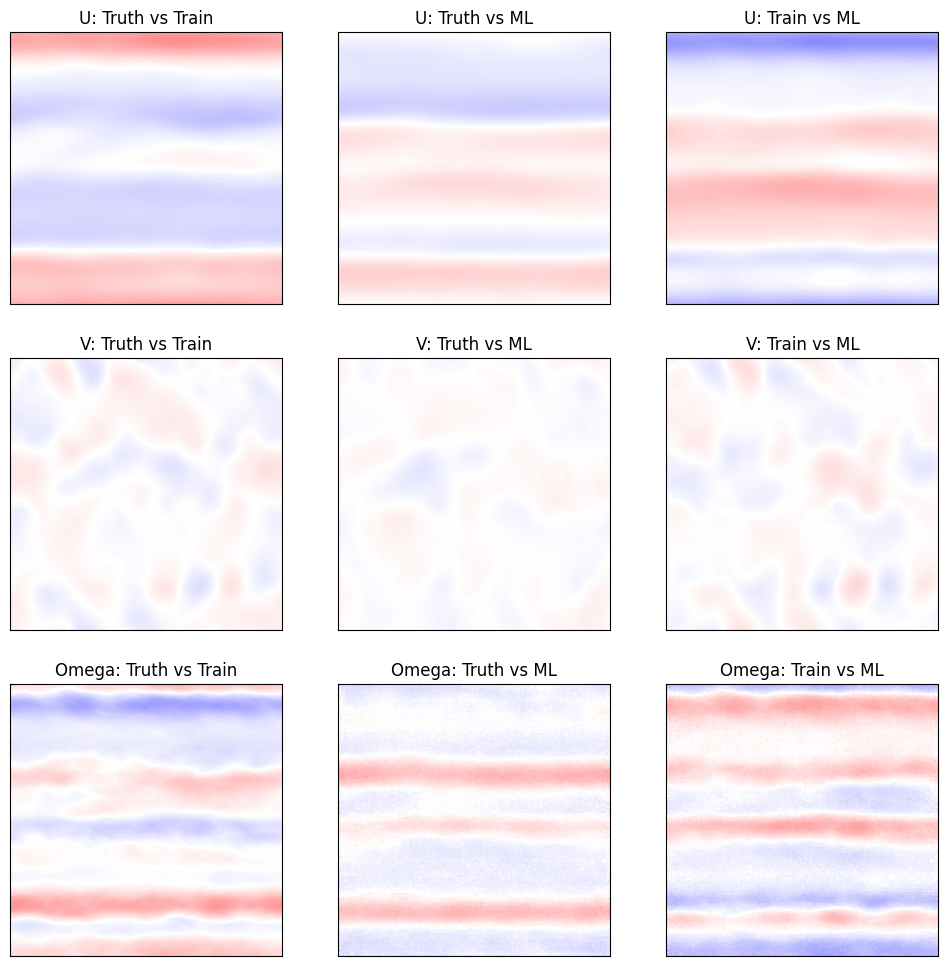

In [7]:
# Plot average (over ensemble) absolute bias for U, V, Omega temporal means

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
titles_1 = ['U', 'V', 'Omega']
titles_2 = ['Truth vs Train', 'Truth vs ML', 'Train vs ML']
contourlevels = 100
vmax = [2, 0.5, 5]
vmin = [-2, -0.5, -5]

plotting_vars = [u_temporal_bias, v_temporal_bias, omega_temporal_bias]
for i in range(3):
    for j in range(3):
        im = axes[i, j].contourf(plotting_vars[i][j], 
                                 levels=contourlevels, 
                                 cmap='bwr', 
                                 vmax=vmax[i], 
                                 vmin=vmin[i])
        axes[i, j].set_title(titles_1[i] + ': ' +titles_2[j])

    #cb = fig.colorbar(im, ax=axes[i, :], orientation='horizontal', shrink=0.45)

# Set aspect ratio to equal and remove labels for all axes
for ax in axes.flat:
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])

### Temporal Means: Variance

In [8]:
# Compute variance (over ensemble) of the temporal bias for U, V, Omega temporal means:
#   var_i(truth - pred_i)
#   var_i(train - pred_i)

def reduce(x, reduce_type):
    if reduce_type == "abs":
        return np.abs(x)
    return x


reduce_type = None

u_temporal_var = []
v_temporal_var = []
omega_temporal_var = []

# Truth vs pred
u_abs_err, v_abs_err, omega_abs_err = [], [], []
for i in range(len(u_mean)):
    u_abs_err.append(reduce(u_mean_truth - u_mean[i], reduce_type))
    v_abs_err.append(reduce(v_mean_truth - v_mean[i], reduce_type))
    omega_abs_err.append(reduce(omega_mean_truth - omega_mean[i], reduce_type))

u_var = np.var(u_abs_err, axis=0)
v_var = np.var(v_abs_err, axis=0)
omega_var = np.var(omega_abs_err, axis=0)
print(f'u_var.shape: {u_var.shape}')

u_temporal_var.append(u_var)
v_temporal_var.append(v_var)
omega_temporal_var.append(omega_var)

# Train vs pred
u_abs_err, v_abs_err, omega_abs_err = [], [], []
for i in range(len(u_mean)):
    u_abs_err.append(reduce(u_mean_train - u_mean[i], reduce_type))
    v_abs_err.append(reduce(v_mean_train - v_mean[i], reduce_type))
    omega_abs_err.append(reduce(omega_mean_train - omega_mean[i], reduce_type))

u_var = np.var(u_abs_err, axis=0)
v_var = np.var(v_abs_err, axis=0)
omega_var = np.var(omega_abs_err, axis=0)
print(f'u_var.shape: {u_var.shape}')

u_temporal_var.append(u_var)
v_temporal_var.append(v_var)
omega_temporal_var.append(omega_var)

u_var.shape: (256, 256)
u_var.shape: (256, 256)


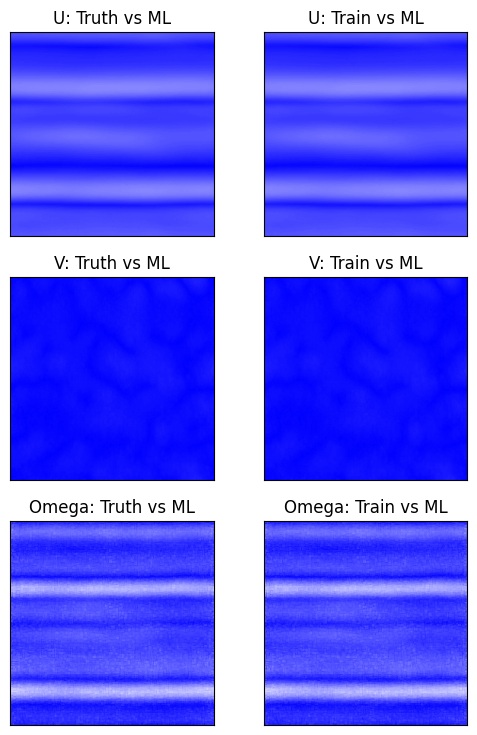

In [9]:
# Plot variance (over ensemble) bias of U, V, Omega temporal means

fig, axes = plt.subplots(3, 2, figsize=(6, 9))
titles_1 = ['U', 'V', 'Omega']
titles_2 = ['Truth vs ML', 'Train vs ML']
contourlevels = 100
vmax = [2, 0.5, 5]
vmin = [0, 0, 0]

plotting_vars = np.sqrt([u_temporal_var, v_temporal_var, omega_temporal_var])
for i in range(3):
    for j in range(2):
        im = axes[i, j].contourf(plotting_vars[i][j], 
                                 levels=contourlevels, 
                                 cmap='bwr', 
                                 vmax=vmax[i], 
                                 vmin=vmin[i])
        axes[i, j].set_title(titles_1[i] + ': ' +titles_2[j])

    #cb = fig.colorbar(im, ax=axes[i, :], orientation='horizontal', shrink=0.5)

# Set aspect ratio to equal and remove labels for all axes
for ax in axes.flat:
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])

### Zonal Means

u_zonal_mean_mean.shape: (256,)


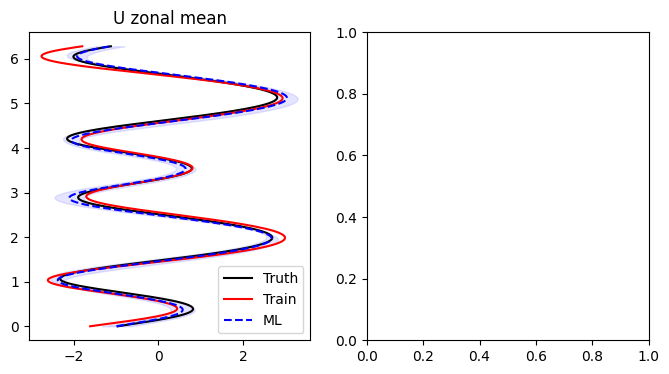

In [10]:
# Compute and plot zonal mean statistics across ensemble

u_zonal_mean_mean = np.mean(u_zonal_mean, axis=0)
u_zonal_mean_std = np.std(u_zonal_mean, axis=0)
print(f'u_zonal_mean_mean.shape: {u_zonal_mean_mean.shape}')

#omega_zonal_mean_mean = np.mean(omega_zonal_mean, axis=0)
#omega_zonal_mean_std = np.std(omega_zonal_mean, axis=0)
#print(f'omega_zonal_mean_mean.shape: {omega_zonal_mean_mean.shape}')

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

y = np.linspace(0, 2*np.pi, u_zonal_mean_mean.shape[0])

axes[0].plot(u_zonal_mean_truth, y, '-k', label='Truth')
axes[0].plot(u_zonal_mean_train, y, '-r', label='Train')
axes[0].plot(u_zonal_mean_mean, y, '--b', label='ML')
axes[0].fill_betweenx(y, u_zonal_mean_mean - u_zonal_mean_std, u_zonal_mean_mean + u_zonal_mean_std, alpha=0.1, color='b')

#axes[1].plot(omega_zonal_mean_mean_truth, y, '-k', label='Truth')
#axes[1].plot(omega_zonal_mean_mean_train, y, '-r', label='Train')
#axes[1].plot(omega_zonal_mean_mean, y, '--b', label='ML')
#axes[1].fill_betweenx(y, omega_zonal_mean_mean - omega_zonal_mean_std, omega_zonal_mean_mean + omega_zonal_mean_std, alpha=0.25, color='b')

axes[0].set_title(f'U zonal mean')
#axes[1].set_title(f'$\omega$ zonal mean')

axes[0].legend()
#axes[1].legend()

### EOF: U

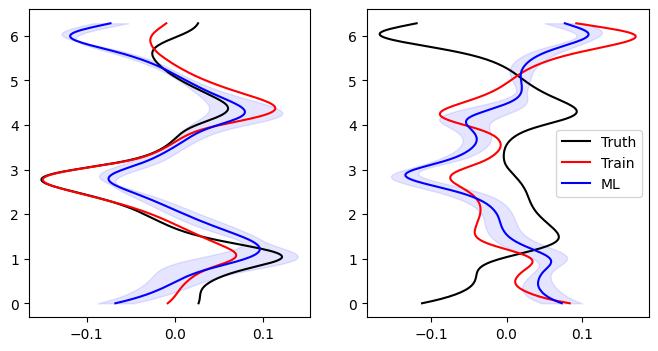

In [11]:
# Compute and plot zonal EOF of U statistics across ensemble

u_eofs_mean, u_eofs_std = [], []
neofs = 2

for i in range(neofs):
    u_eofs_mean.append(np.mean([u_eofs[j][:, i] for j in range(len(u_eofs))], axis=0))
    u_eofs_std.append(np.std([u_eofs[j][:, i] for j in range(len(u_eofs))], axis=0))


fig, axes = plt.subplots(1, 2, figsize=(8, 4))

y = np.linspace(0, 2*np.pi, u_eofs_train.shape[0])

axs = axes.flatten()
for i in range(neofs):
    axs[i].plot(u_eofs_truth[i, :], y, '-k', label='Truth')
    axs[i].plot(u_eofs_train[:, i], y, '-r', label='Train')
    axs[i].plot(u_eofs_mean[i], y, '-b', label='ML')
    axs[i].fill_betweenx(y, u_eofs_mean[i] - u_eofs_std[i], u_eofs_mean[i] + u_eofs_std[i],
                         color='b', alpha=0.1)

plt.legend()

### EOF: Omega

In [ ]:
# Compute and plot zonal EOF of Omega statistics across ensemble

omega_eofs_mean, omega_eofs_std = [], []
neofs = 2

for i in range(neofs):
    omega_eofs_mean.append(np.mean([omega_eofs[j][:, i] for j in range(len(omega_eofs))], axis=0))
    omega_eofs_std.append(np.std([omega_eofs[j][:, i] for j in range(len(omega_eofs))], axis=0))


fig, axes = plt.subplots(1, 2, figsize=(8, 4))

y = np.linspace(0, 2*np.pi, omega_eofs_train.shape[0])

axs = axes.flatten()
for i in range(neofs):
    axs[i].plot(omega_eofs_truth[i, :], y, '-k', label='Truth')
    axs[i].plot(omega_eofs_train[:, i], y, '-r', label='Train')
    axs[i].plot(omega_eofs_mean[i], y, '-b', label='ML')
    axs[i].fill_betweenx(y, omega_eofs_mean[i] - omega_eofs_std[i], omega_eofs_mean[i] + omega_eofs_std[i],
                         color='b', alpha=0.1)

plt.legend()

### Divergence

<>:12: SyntaxWarning: invalid escape sequence '\l'
<>:12: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_1533246/3417664053.py:12: SyntaxWarning: invalid escape sequence '\l'
  axes.set_title('$ \langle |\\nabla \cdot u |\\rangle$')


Text(0.5, 1.0, '$ \\langle |\\nabla \\cdot u |\\rangle$')

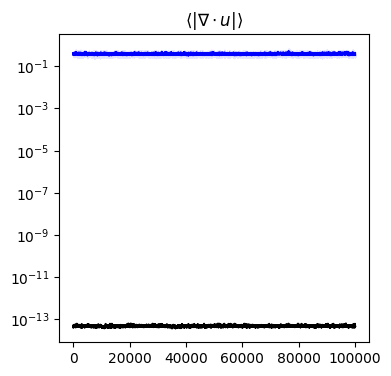

In [12]:
# Compute and plot statistics (across emulators) of divergence of flow

div_mean = np.mean(div, axis=0)
div_std = np.std(div, axis=0)

fig, axes = plt.subplots(1, figsize=(4, 4))

x = np.arange(1, div_truth.shape[0]+1)
axes.semilogy(x, div_truth, '-k', label='Truth')
axes.semilogy(x, div_mean, '-b', label='ML')
axes.fill_between(x, div_mean-div_std, div_mean+div_std, color='b', alpha=0.1)
axes.set_title('$ \langle |\\nabla \cdot u |\\rangle$')

### Return Periods of Extremes

In [ ]:
# Compute statistics of return period across emulator ensemble

def empirical_return_period(X, dt=1):
    """Get empirical return period. Returns 'return_period' and 'data_amplitude';
    both are used to plot empirical return period."""

    # Empirical return period
    data_amplitude = np.sort(X)
    n = len(X)
    m = np.arange(1, n + 1)
    cdf_empirical = m / (n + 1)
    return_period = 1 / (1 - cdf_empirical)

    return return_period*dt, data_amplitude

dt = 0.02

# Calculating return periods and amplitudes in U/V/Omega for 
# each emlator. Then combining them into a single list of U/V/Omega
u_max_return_period, u_max_amplitude  = [], []
u_min_return_period, u_min_amplitude = [], []
v_max_return_period, v_max_amplitude = [], []
v_min_return_period, v_min_amplitude = [], []
omega_max_return_period, omega_max_amplitude  = [], []
omega_min_return_period, omega_min_amplitude = [], []

maxmin_returns = [u_max_return_period, v_max_return_period, omega_max_return_period, u_min_return_period, v_min_return_period, omega_min_return_period]
maxmin_amps = [u_max_amplitude, v_max_amplitude, omega_max_amplitude, u_min_amplitude, v_min_amplitude, omega_min_amplitude]
raw_data = [u_max, v_max, omega_max, u_min, v_min, omega_min]

for i in range(len(u_max)):
    for data, returns, amps in zip(raw_data, maxmin_returns, maxmin_amps):
        rp, amp = empirical_return_period(data[i], dt=dt)
        returns.append(rp)
        amps.append(amp)


# Compute statistics across emulators
u_max_return_period_mean = np.mean(u_max_return_period, axis=0)
u_max_return_period_std = np.std(u_max_return_period, axis=0)
u_min_return_period_mean = np.mean(u_min_return_period, axis=0)
u_min_return_period_std = np.mean(u_min_return_period, axis=0)
v_max_return_period_mean = np.mean(v_max_return_period, axis=0)
v_max_return_period_std = np.std(v_max_return_period, axis=0)
v_min_return_period_mean = np.mean(v_min_return_period, axis=0)
v_min_return_period_std = np.mean(v_min_return_period, axis=0)
omega_max_return_period_mean = np.mean(omega_max_return_period, axis=0)
omega_max_return_period_std = np.std(omega_max_return_period, axis=0)
omega_min_return_period_mean = np.mean(omega_min_return_period, axis=0)
omega_min_return_period_std = np.mean(omega_min_return_period, axis=0)

# Compute truth/train return periods and amplitude
